In [1]:
! pip install transformers -q

     |████████████████████████████████| 3.4 MB 14.8 MB/s 
     |████████████████████████████████| 3.3 MB 32.8 MB/s 
     |████████████████████████████████| 61 kB 519 kB/s 
     |████████████████████████████████| 596 kB 68.4 MB/s 
     |████████████████████████████████| 895 kB 75.3 MB/s 


In [2]:
from transformers import pipeline


In [ ]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [3]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

404 Client Error: Not Found for url: https://huggingface.co/arpanghoshal/EmoRoBERTa/resolve/main/pytorch_model.bin


Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [53]:
emotion_labels = emotion("I'm sorry that the order got delayed")


In [54]:
emotion_labels

[{'label': 'remorse', 'score': 0.7496773600578308}]

In [55]:
emotion_labels[0]['label']

'remorse'

In [56]:
import pandas as pd

In [58]:
large_text = pd.read_csv('https://github.com/abishekarun/Text-Emotion-Classification/blob/master/text_emotion.csv?raw=true')

In [59]:
large_text.shape

(40000, 4)

In [60]:
large_text.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [61]:
large_text = large_text[:100]

In [62]:
large_text.shape

(100, 4)

In [63]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'neutral', 'score': 0.9288994073867...
2      [{'label': 'joy', 'score': 0.7030636668205261}]
3      [{'label': 'joy', 'score': 0.5057844519615173}]
4    [{'label': 'desire', 'score': 0.80342710018157...
5    [{'label': 'neutral', 'score': 0.9537405967712...
6    [{'label': 'neutral', 'score': 0.3837689757347...
7    [{'label': 'approval', 'score': 0.636145949363...
8     [{'label': 'love', 'score': 0.9831995964050293}]
9    [{'label': 'remorse', 'score': 0.4822785258293...
Name: content, dtype: object

In [65]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [67]:
get_emotion_label("India played very well and the fans were amused")

'amusement'

In [68]:
large_text['content'][1:10].apply(get_emotion_label)

1     neutral
2         joy
3         joy
4      desire
5     neutral
6     neutral
7    approval
8        love
9     remorse
Name: content, dtype: object

In [69]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)

In [70]:
large_text

,tweet_id,sentiment,author,content,emotion
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,neutral
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,joy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,joy
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,desire
...,...,...,...,...,...
95,1956989514,sadness,yellowduckx,@sweeetnspicy hiii im on my ipod...i cant fall...,neutral
96,1956989526,sadness,KaKuBby,dont wanna work 11-830 tomorrow but i get paid,disapproval
97,1956989560,sadness,benchidol,feels sad coz i wasnt able to play with the gu...,sadness
98,1956989561,neutral,outrAjusCharmer,PrinceCharming,neutral


In [71]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

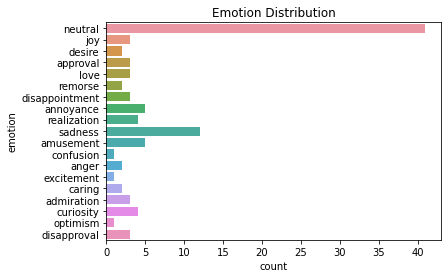

In [73]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")